# Imports

In [11]:
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [12]:
datafilename: str = 'data/winequality-white.csv'  

num_samples: int = 4899
num_features: int = 11

# Data Processing

Open and read data file in csv format.

After processing: 
- `data`  is the variable holding the features;
- `target` is the variable holding the class labels.

In [13]:
try:
    with open( datafilename ) as infile:
        indata = csv.reader( infile )
        data = np.empty(( num_samples, num_features ))
        target = np.empty(( num_samples,), dtype=int )
        i = 0
        for j, d in enumerate(indata):
            if j == 0:                      # Pull out the first line as 
                feature_names = d           # feature 
            else:
                ok = True
                for k in range(0,num_features): # If a feature has a missing value
                    if ( d[k] == "?" ):         # we don't use that record.
                        ok = False
                if ( ok ):
                    data[i] = np.asarray( d[:-1], dtype=np.float64 )
                    target[i] = np.asarray( d[-1], dtype=int )
                    i = i + 1
except IOError as iox:
    print('there was an I/O error trying to open the data file: ' + str(iox))
    sys.exit()
except Exception as x:
    print('there was an error: ' + str(x))
    sys.exit()

Checking number of samples after processing

In [14]:
num_samples: int = i
print("Number of samples:", num_samples)

Number of samples: 4898


Set of features

In [15]:
data

array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
       [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
       [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan]])

Diagnosis for each set of features

In [16]:
target

array([ 6,  6,  6, ...,  7,  6, -1])

Names of the features

In [17]:
feature_names

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

# Splitting Data

Downsampling data as suggested by the worksheet as there is a lot of data

In [18]:
X_big, X_small, y_big, y_small = train_test_split(data, target, test_size=0.1, random_state=0)

Now doing the standard splitting into training and testing sets as usual

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, random_state=0)

In [20]:
print("Training Data Size:", len(X_train))


Training Data Size: 392


Visualizes how well different SVR models perform regression on each individual feature by assessing their error metrics and plotting their predictions alongside the training data.


Feature: fixed acidity
Mean squared error (SVR linear): 0.70
Variance score (SVR linear): -0.00
Mean squared error (SVR RBF): 0.67
Variance score (SVR RBF): 0.04


Mean squared error (SVR poly): 0.70
Variance score (SVR poly): -0.00

Feature: volatile acidity
Mean squared error (SVR linear): 0.70
Variance score (SVR linear): -0.00
Mean squared error (SVR RBF): 0.72
Variance score (SVR RBF): -0.03
Mean squared error (SVR poly): 0.70
Variance score (SVR poly): -0.00

Feature: citric acid
Mean squared error (SVR linear): 0.70
Variance score (SVR linear): -0.00
Mean squared error (SVR RBF): 0.70
Variance score (SVR RBF): 0.00
Mean squared error (SVR poly): 0.70
Variance score (SVR poly): -0.00

Feature: residual sugar
Mean squared error (SVR linear): 0.70
Variance score (SVR linear): -0.00
Mean squared error (SVR RBF): 0.70
Variance score (SVR RBF): 0.00
Mean squared error (SVR poly): 0.70
Variance score (SVR poly): -0.00

Feature: chlorides
Mean squared error (SVR linear): 0.70
Variance score (SVR linear): 0.00
Mean squared error (SVR RBF): 0.67
Variance score (SVR RBF): 0.05
Mean squared error (SVR poly): 0.69
Variance score (SVR poly): 0.01

Featu

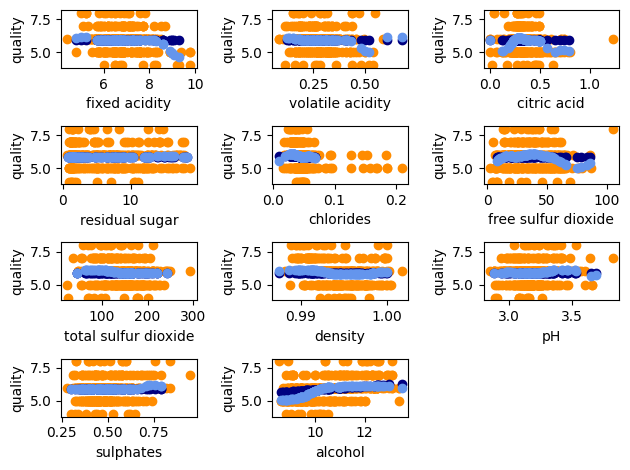

In [21]:
# Now do regression on each feature in turn.
for i in range (num_features):
        print()
        print("Feature:", feature_names[i])
        # Pull out a subset of the data:
        reduced_X_train = X_train[:, [i]]
        reduced_X_test = X_test[:, [i]]

        # Build, train and test regression models
        #
        # Linear SVR
        svr_linear = SVR(kernel='linear')
        svr_linear.fit(reduced_X_train, y_train)
        print("Mean squared error (SVR linear): %.2f"
              % np.mean((svr_linear.predict(reduced_X_test) - y_test) ** 2))
        print('Variance score (SVR linear): %.2f'
              % svr_linear.score(reduced_X_test, y_test))       
        # RBF SVR
        svr_rbf    = SVR(kernel='rbf')
        svr_rbf.fit(reduced_X_train, y_train)
        print("Mean squared error (SVR RBF): %.2f"
              % np.mean((svr_rbf.predict(reduced_X_test) - y_test) ** 2))
        print('Variance score (SVR RBF): %.2f'
              % svr_rbf.score(reduced_X_test, y_test))
        
        #
        # Polynomial SVR
        # This one is super slow --- comment it out if you get bored.
        svr_poly   = SVR(kernel='poly', degree=2)
        svr_poly.fit(reduced_X_train, y_train)
        print("Mean squared error (SVR poly): %.2f"
              % np.mean((svr_poly.predict(reduced_X_test) - y_test) ** 2))
        print('Variance score (SVR poly): %.2f'
              % svr_poly.score(reduced_X_test, y_test))       
        
        # Plot the results. Training data in orange and each regression model
        # in a shade of blue.
        plt.subplot( 4, 3, i+1 )
        plt.scatter(reduced_X_train, y_train, color="darkorange")
        plt.scatter(reduced_X_test, svr_linear.predict(reduced_X_test), color="navy")
        plt.scatter(reduced_X_test, svr_rbf.predict(reduced_X_test), color="cornflowerblue")
        # This model tends to dominate the plots, so we leave it out.
        #plt.scatter(reduced_X_test, svr_poly.predict(reduced_X_test), color="c")
        plt.xlabel(feature_names[i])
        plt.ylabel('quality')
        plt.tight_layout()   # Make sure labels can be seen
        
        # End of loop

plt.show()